# ARAD

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import random

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
# from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from matplotlib import dates
%matplotlib inline

In [3]:
sns.set_style('whitegrid')
# print(plt.style.available)

In [4]:
# define the list of ARAD chapters to track
chapters = ['loans', 'rates', 'gdp', 'cpi']

## 1. Dictionary - url

Hardcoded data 'od' 'do'. Tezko automatizovat, nektera data mesicni, jina ctvrtletni. Data jsou k dispozici se zpozdenim. <br>
Data se nacitaji: serazena vzestupne a s desetinnou teckou (carku Python nebere).

In [5]:
urls = dict(
loans_url = 'https://www.cnb.cz/cnb/STAT.ARADY_PKG.VYSTUP?p_period=1&p_sort=1&p_des=50&p_sestuid=1538&p_uka=1%2C2%2C3&p_strid=AAD&p_od=200512&p_do=209912&p_lang=CS&p_format=2&p_decsep=.',
rates_url = 'https://www.cnb.cz/cnb/STAT.ARADY_PKG.VYSTUP?p_period=1&p_sort=1&p_des=50&p_sestuid=49609&p_uka=1%2C2%2C3%2C4%2C5%2C6%2C7%2C8%2C9%2C10%2C11%2C12%2C13%2C14&p_strid=AAD&p_od=200401&p_do=209912&p_lang=CS&p_format=2&p_decsep=.',
gdp_url = 'https://www.cnb.cz/cnb/STAT.ARADY_PKG.VYSTUP?p_period=3&p_sort=1&p_des=50&p_sestuid=29930&p_uka=1%2C2%2C3%2C4%2C5&p_strid=ACL&p_od=199603&p_do=209909&p_lang=CS&p_format=2&p_decsep=.',
cpi_url = 'https://www.cnb.cz/cnb/STAT.ARADY_PKG.VYSTUP?p_period=1&p_sort=1&p_des=50&p_sestuid=6546&p_uka=1%2C2%2C3%2C4&p_strid=ACL&p_od=200001&p_do=209909&p_lang=CS&p_format=2&p_decsep=.'
)
# Source: https://www.cnb.cz/cnb/STAT.ARADY_PKG.hlavni_ukazatele?p_iframe=0&p_lang=CS

## 2. Dictionary - data

Kodovani je utf-8. Vyzkouseno i s .....

In [6]:
# dict 2 - data
data = {}
for chapter, chapter_url in zip(chapters,urls):
    data[chapter+'_data'] = pd.read_csv(urls[chapter_url],sep='|',skiprows=0,verbose=False,encoding ='utf-8',header=0)

In [7]:
# Converting and reindexing the data (index = time)
for chapter in data:
    #data = data.apply(lambda x: x.str.replace(",", "."))
    data[chapter].iloc[:,0] = pd.to_datetime(data[chapter].iloc[:,0])
    data[chapter].set_index('Období',inplace=True)
    data[chapter].dropna(inplace=True)

## 3. Dictionary - Relative changes

In [8]:
# dict 3 - data
data_rel = {}
for chapter in chapters:
    data_rel[chapter+'_rel'] = data[chapter+'_data'].pct_change(periods=12)
    #data[chapter+'_rel'].rename(columns = list(data[chapter+'_rel'].columns))
    data_rel[chapter+'_rel'].columns = ((str(col) + '_rel') for col in data_rel[chapter+'_rel'].columns)

In [9]:
data_rel = {}
data_rel['loans_rel'] = data['loans_data'].pct_change(periods=12)

In [10]:
data_rel['loans_rel'].columns = ((str(col) + '_rel') for col in data_rel['loans_rel'].columns)
data_rel['loans_rel']

,UK1 Na spotřebu_rel,UK2 Na bydlení_rel,UK3 Ostatní_rel
Období,,,
2005-12-31,NaN,NaN,NaN
2006-01-31,NaN,NaN,NaN
2006-02-28,NaN,NaN,NaN
2006-03-31,NaN,NaN,NaN
2006-04-30,NaN,NaN,NaN
2006-05-31,NaN,NaN,NaN
2006-06-30,NaN,NaN,NaN
2006-07-31,NaN,NaN,NaN
2006-08-31,NaN,NaN,NaN


In [21]:
data['cpi_data']

,UK1 předchozí měsíc = 100,UK2 stejné období předchozího roku = 100,UK3 průměr roku 2005 = 100,UK4 Míra inflace (roční klouzavý průměr)
Období,,,,
2000-01-31,101.7,103.4,88.5,102.1
2000-02-29,100.2,103.7,88.7,102.2
2000-03-31,100.0,103.8,88.7,102.3
2000-04-30,99.9,103.4,88.6,102.4
2000-05-31,100.2,103.7,88.7,102.5
2000-06-30,100.6,104.1,89.3,102.6
2000-07-31,100.6,103.9,89.8,102.9
2000-08-31,100.2,104.1,90.0,103.1
2000-09-30,100.0,104.1,90.0,103.3


In [311]:
# Merge data[chapter] with relative changes: data_rel[chapter]
# for chapter in chapters:
#    data[chapter + '_data'] = pd.merge(data[chapter + '_data'],data_rel[chapter + '_rel'],right_index=True,left_index=True)

---------------------------
## PLOTTING

In [312]:
# Macro plot set-up
years = dates.YearLocator()   # every year
months = dates.MonthLocator()  # every month
years_fmt = dates.DateFormatter('%Y')
months_fmt = dates.DateFormatter('%b / %y')

In [320]:
# data_rel['loans_rel'].tail()

In [319]:
# data['loans_data'].info()

---------------------------
### 1. Loans

#### Loans - Absolute values

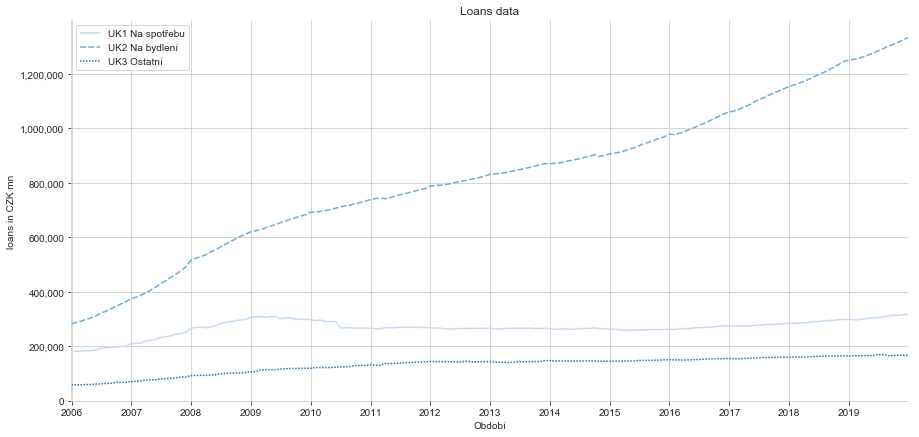

In [315]:
# Plotting loans in absolute values for the entire period
plt.figure(figsize=(15, 7))
ax = sns.lineplot(data=data['loans_data'][['UK1 Na spotřebu','UK2 Na bydlení','UK3 Ostatní']],palette='Blues',size = 2)

plt.ylim(0)
plt.xlim(data['loans_data'].index[0],'2019-12-31')
plt.title('Loans data')
ax.set(ylabel='loans in CZK mn')
ax.set_yticklabels(['{:,.0f}'.format(x) for x in ax.get_yticks()])

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

ax.tick_params(axis='both', bottom=True, left=True)

sns.despine()

#### Loans - Relative changes

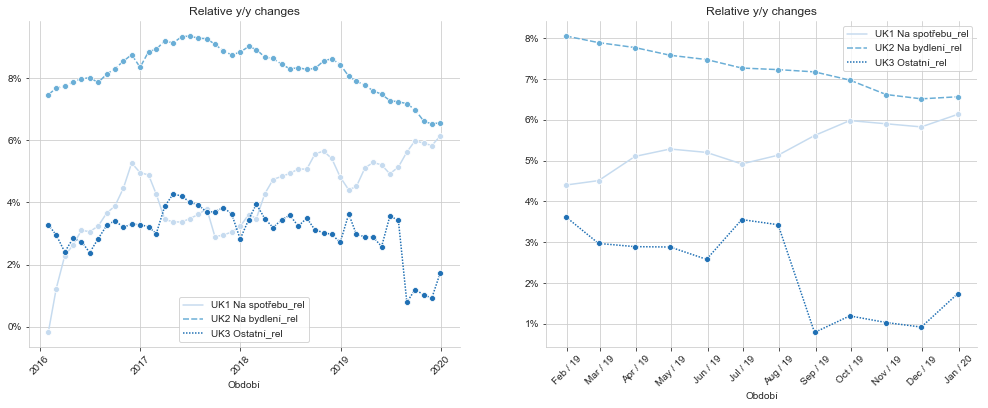

In [123]:
Title_relative = 'Relative y/y changes'
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(17,6))
data_rel_2yr = data_rel['loans_rel'].iloc[-48:,:] # selects data subset for the last 4 years

ax1 = sns.lineplot(data=data_rel_2yr, palette='Blues', ax=ax1, marker="o")
ax2 = sns.lineplot(data=data_rel_2yr.iloc[-12:,:], palette='Blues', ax=ax2, marker="o")
#ax1.plot(data_rel, linewidth=2, marker='o', markersize=4)
#ax2.plot(data_rel, linewidth=2, marker='o', markersize=4)

ax1.set_title(Title_relative)
ax1.set_yticklabels(['{:,.0%}'.format(x) for x in ax1.get_yticks()])
ax1.set_xticklabels(data_rel_2yr.index.strftime("%b / %y"), rotation = 45)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax2.set_title(Title_relative)
#ax2.set_xlim(left=data_rel_2yr.index[-13])
ax2.set_yticklabels(['{:,.0%}'.format(x) for x in ax2.get_yticks()])
ax2.set_xticklabels(data_rel_2yr.index.strftime("%b / %y"), rotation = 45)

ax2.xaxis.set_major_locator(months)
ax2.xaxis.set_major_formatter(months_fmt)
ax2.xaxis.set_minor_locator(months)

for ax in (ax1,ax2): # axis tick marks
    ax.tick_params(axis='both', bottom=True, left=True)

sns.despine()

In [ ]:
Title_relative = 'Relative y/y changes'
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(17,6))
data_rel_2yr = data_rel['loans_rel'].iloc[-48:,:]    # selects data subset for the last 4 years

ax1 = sns.lineplot(data=data_rel_2yr, palette='Blues', ax=ax1, marker="o")
ax2 = sns.lineplot(data=data_rel_2yr, palette='Blues', ax=ax2, marker="o")
#ax1.plot(data_rel, linewidth=2, marker='o', markersize=4)
#ax2.plot(data_rel, linewidth=2, marker='o', markersize=4)

ax1.set_title(Title_relative)
ax1.set_yticklabels(['{:,.0%}'.format(x) for x in ax1.get_yticks()])
ax1.set_xticklabels(data_rel_2yr.index.strftime("%b / %y"), rotation = 45)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax2.set_title(Title_relative)
ax2.set_xlim(left=data_rel_2yr.index[-12])
ax2.set_yticklabels(['{:,.0%}'.format(x) for x in ax2.get_yticks()])
ax2.set_xticklabels(data_rel_2yr.index[-12:].strftime("%b / %y"), rotation = 45)

#ax2.xaxis.set_major_locator(months)
#ax2.xaxis.set_major_formatter(months_fmt)
#ax2.xaxis.set_minor_locator(months)

for ax in (ax1,ax2): # axis tick marks
    ax.tick_params(axis='both', bottom=True, left=True)

sns.despine()

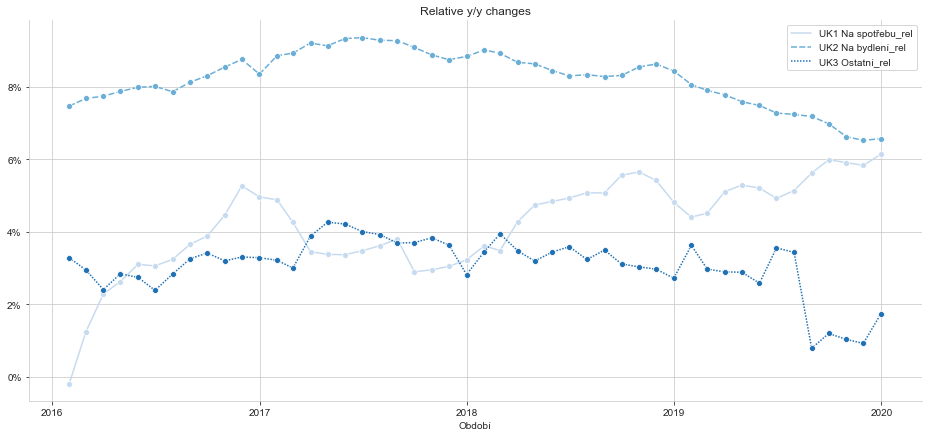

In [96]:
Title_relative = 'Relative y/y changes'
plt.figure(figsize=(16, 7))
ax = sns.lineplot(data=data_rel['loans_rel'].iloc[-48:,:],palette='Blues',size = 2,marker='o')

plt.title(Title_relative)
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax1.get_yticks()])
#ax.set_xticklabels(data_rel.index,rotation = 45)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
#ax.xaxis.set_minor_formatter(months_fmt)

ax.tick_params(axis='both', bottom=True, left=True)

sns.despine()

In [78]:
data_rel['loans_rel'].tail()

,UK1 Na spotřebu_rel,UK2 Na bydlení_rel,UK3 Ostatní_rel
Období,,,
2019-09-30,0.059819,0.069751,0.011936
2019-10-31,0.059034,0.066203,0.010309
2019-11-30,0.058268,0.065146,0.009196
2019-12-31,0.061339,0.065650,0.017380
2020-01-31,0.067360,0.063919,0.006957


---------------------------
### 2. Rates

In [20]:
data['rates_data'].drop(axis=1,columns=list(data['rates_data'].columns)[14:],inplace=True)
data['rates_data']

,UK1 Jednodenní vklady (%),UK2 z toho: vklady na běžných účtech (%),UK3 z toho: vklady na spořících účtech (%),UK4 Vklady s výpovědní lhůtou (%),UK5 Vklady s dohodnutou splatností (%),UK6 Úvěry na spotřebu (%),UK7 Úvěry na bydlení (%),UK8 z toho: hypoteční úvěry (%),UK9 z toho: stavební spoření - úvěry na bydlení (%),UK10 Úvěry ostatní (%),UK11 Úvěry kontokorentní a revolvingové (%),UK12 z toho: kontokorentní úvěry (%),UK13 Pohledávky z kreditních karet (%),UK14 z toho: úročené úvěry z kreditních karet (%)
Období,,,,,,,,,,,,,,
2004-01-31,0.51,0.57,0.15,1.27,1.25,14.53,5.37,5.07,5.84,5.65,NaN,13.50,21.29,NaN
2004-02-29,0.50,0.56,0.15,1.27,1.20,14.96,5.42,5.08,5.86,5.79,NaN,13.30,21.20,NaN
2004-03-31,0.51,0.56,0.17,1.30,1.23,15.03,5.32,4.90,5.82,10.64,NaN,13.63,21.27,NaN
2004-04-30,0.51,0.56,0.18,1.31,1.25,14.50,5.24,4.81,5.74,5.69,NaN,13.71,21.36,NaN
2004-05-31,0.52,0.57,0.18,1.33,1.07,14.69,5.08,4.67,5.54,5.37,NaN,13.76,21.33,NaN
2004-06-30,0.52,0.57,0.18,1.36,1.31,14.95,5.01,4.71,5.49,5.70,NaN,13.53,21.36,NaN
2004-07-31,0.50,0.55,0.15,1.43,1.49,14.90,5.17,4.93,5.45,6.08,NaN,13.73,21.37,NaN
2004-08-31,0.50,0.55,0.15,1.44,1.60,15.23,5.17,4.98,5.40,5.85,NaN,13.87,21.41,NaN
2004-09-30,0.50,0.56,0.12,1.49,1.74,14.52,5.31,5.09,5.48,6.43,NaN,13.82,21.33,NaN


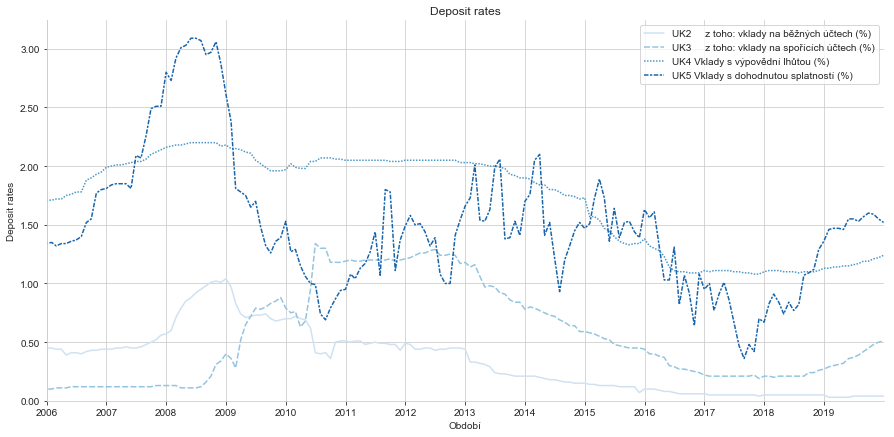

In [21]:
# Plotting vklady in absolute values for the entire period
plt.figure(figsize=(15, 7))
ax = sns.lineplot(data=data['rates_data'].iloc[:,1:5],palette='Blues',size = 2)

plt.ylim(0)
plt.xlim(data['loans_data'].index[0],'2019-12-31')
plt.title('Deposit rates')
ax.set(ylabel='Deposit rates')
ax.set_yticklabels(['{0:.2f}'.format(x) for x in ax.get_yticks()])

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

ax.tick_params(axis='both', bottom=True, left=True)

sns.despine()

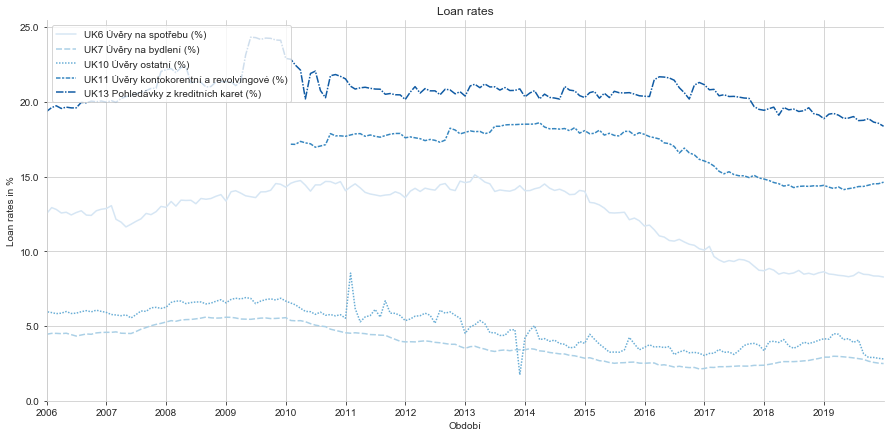

In [22]:
# Plotting loan rates in absolute values for the entire period
plt.figure(figsize=(15, 7))
ax = sns.lineplot(data=data['rates_data'].iloc[:,[5,6,9,10,12]],palette='Blues',size = 2)

plt.ylim(0)
plt.xlim(data['loans_data'].index[0],'2019-12-31')
plt.title('Loan rates')
ax.set(ylabel='Loan rates in %')
ax.set_yticklabels(['{0:.1f}'.format(x) for x in ax.get_yticks()])

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

ax.tick_params(axis='both', bottom=True, left=True)
ax.legend(loc='upper left')

sns.despine()

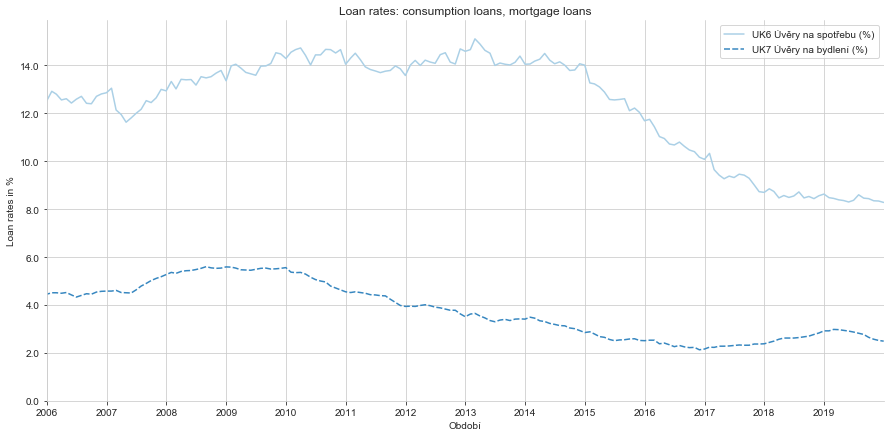

In [23]:
# Plotting loan rates in absolute values for the entire period
plt.figure(figsize=(15, 7))
ax = sns.lineplot(data=data['rates_data'].iloc[:,[5,6]],palette='Blues',size = 2)

plt.ylim(0)
plt.xlim(data['loans_data'].index[0],'2019-12-31')
plt.title('Loan rates: consumption loans, mortgage loans')
ax.set(ylabel='Loan rates in %')
ax.set_yticklabels(['{0:.1f}'.format(x) for x in ax.get_yticks()])

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

ax.tick_params(axis='both', bottom=True, left=True)

sns.despine()

In [24]:
data['rates_data'].tail()

,UK1 Jednodenní vklady (%),UK2 z toho: vklady na běžných účtech (%),UK3 z toho: vklady na spořících účtech (%),UK4 Vklady s výpovědní lhůtou (%),UK5 Vklady s dohodnutou splatností (%),UK6 Úvěry na spotřebu (%),UK7 Úvěry na bydlení (%),UK8 z toho: hypoteční úvěry (%),UK9 z toho: stavební spoření - úvěry na bydlení (%),UK10 Úvěry ostatní (%),UK11 Úvěry kontokorentní a revolvingové (%),UK12 z toho: kontokorentní úvěry (%),UK13 Pohledávky z kreditních karet (%),UK14 z toho: úročené úvěry z kreditních karet (%)
Období,,,,,,,,,,,,,,
2019-08-31,0.21,0.04,0.42,1.19,1.57,8.46,2.77,2.61,4.21,3.14,14.34,17.94,18.76,24.18
2019-09-30,0.22,0.04,0.45,1.19,1.60,8.44,2.65,2.49,4.05,2.90,14.42,18.04,18.87,24.16
2019-10-31,0.24,0.04,0.48,1.21,1.59,8.35,2.57,2.42,3.82,2.90,14.51,18.18,18.64,24.14
2019-11-30,0.25,0.04,0.50,1.22,1.55,8.34,2.52,2.38,3.87,2.84,14.52,18.21,18.56,24.13
2019-12-31,0.25,0.04,0.51,1.24,1.52,8.28,2.49,2.35,3.90,2.80,14.62,18.25,18.36,24.12


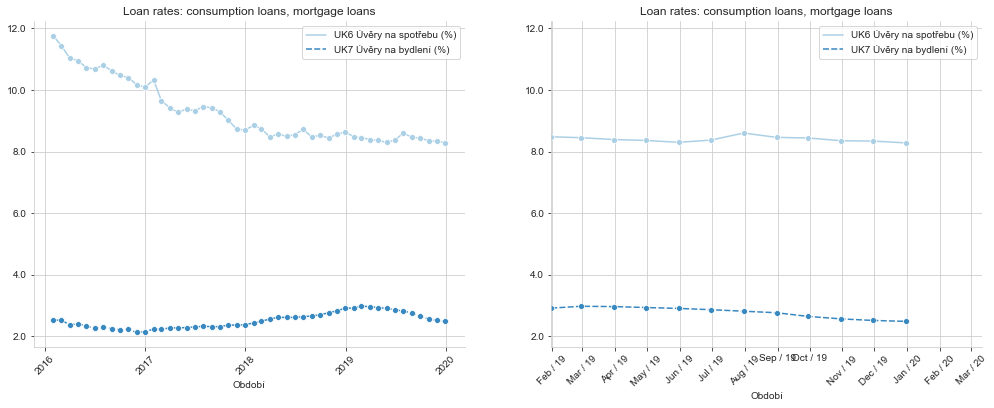

In [25]:
Title_relative = 'Loan rates: consumption loans, mortgage loans'
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(17,6))
data_rel = data['rates_data'].iloc[-48:,[5,6]]  # selects data subset for the last 4 years

ax1 = sns.lineplot(data=data_rel, palette='Blues', ax=ax1, marker="o")
ax2 = sns.lineplot(data=data_rel, palette='Blues', ax=ax2, marker="o")
#ax1.plot(data_rel, linewidth=2, marker='o', markersize=4)
#ax2.plot(data_rel, linewidth=2, marker='o', markersize=4)

ax1.set_title(Title_relative)
ax1.set_yticklabels(['{0:.1f}'.format(x) for x in ax1.get_yticks()])
ax1.set_xticklabels(data_rel.index.strftime("%b / %y"), rotation = 45)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax2.set_title(Title_relative)
ax2.set_xlim(left=data_rel.index[-12])
ax2.set_yticklabels(['{0:.1f}'.format(x) for x in ax2.get_yticks()])
ax2.set_xticklabels(data_rel.index[-12:].strftime("%b / %y"), rotation = 45)

ax2.xaxis.set_major_locator(months)
ax2.xaxis.set_major_formatter(months_fmt)
ax2.xaxis.set_minor_locator(months)

for ax in (ax1,ax2):
    ax.tick_params(axis='both', bottom=True, left=True)

sns.despine()

---------------------------
### 3. GDP

In [26]:
data['gdp_data'].tail()

,UK1 Stálé ceny roku 2010 v mld. Kč,UK2 Mezičtvrtletní změny,UK3 Meziroční změny,UK4 Deflátory - mezičtvrtletní změny,UK5 Deflátory - meziroční změny
Období,,,,,
2018-09-30,1188.0,100.6,102.4,101.0,102.5
2018-12-31,1198.6,100.9,102.6,100.8,102.6
2019-03-31,1205.7,100.6,102.7,101.2,103.4
2019-06-30,1213.0,100.6,102.8,100.6,103.6
2019-09-30,1217.9,100.4,102.5,101.0,103.6


In [27]:
#data['gdp_data'].drop(axis=1,columns=list(data['gdp_data'].columns)[5:],inplace=True

In [28]:
data['gdp_data'].sort_index(ascending=True, inplace=True)

In [29]:
# from quarterly data make cummulative yearly GDP
data['gdp_data'].iloc[:,0] = data['gdp_data'].iloc[:,0].rolling(window=4).sum()

### Loans to GDP

* Need to resample data['loans_data'] to quarterly
* Need to pair with data['gdp_data'] acc. to dates

In [30]:
loans_to_gdp = pd.merge(data['gdp_data'].iloc[:,0].to_frame(),
                        data['loans_data'].resample('Q',convention='start').asfreq().iloc[:,0:3],
                        how='inner',right_index=True,left_index=True)
loans_to_gdp.rename(columns={list(loans_to_gdp.columns)[0]:'GDP v mil. Kč'},inplace=True)
loans_to_gdp.iloc[:,0] = loans_to_gdp.iloc[:,0] * 1000

In [31]:
loans_to_gdp.tail(10)

,GDP v mil. Kč,UK1 Na spotřebu,UK2 Na bydlení,UK3 Ostatní
Období,,,,
2017-06-30,4497800.0,277579.3,1105502.1,157756.8
2017-09-30,4554200.0,279637.7,1129086.5,159539.6
2017-12-31,4610500.0,284858.5,1153144.5,159931.4
2018-03-31,4656800.0,285962.8,1171687.4,160732.9
2018-06-30,4682500.0,291258.5,1197187.6,163413.7
2018-09-30,4710000.0,295176.5,1222873.0,164501.2
2018-12-31,4740700.0,298565.2,1250348.6,164271.1
2019-03-31,4772800.0,300555.0,1262747.3,165379.8
2019-06-30,4805300.0,305583.6,1284220.0,169222.3


In [32]:
loans_to_gdp_rel = pd.DataFrame()
for column in list(loans_to_gdp.columns):
    loans_to_gdp_rel[column] = loans_to_gdp.loc[:,column] / loans_to_gdp.iloc[:,0]

#for i in range(len(data['loans_data'].columns)):
#   loans_to_gdp_rel[i] = loans_to_gdp.iloc[:,i] / loans_to_gdp.iloc[:,0]

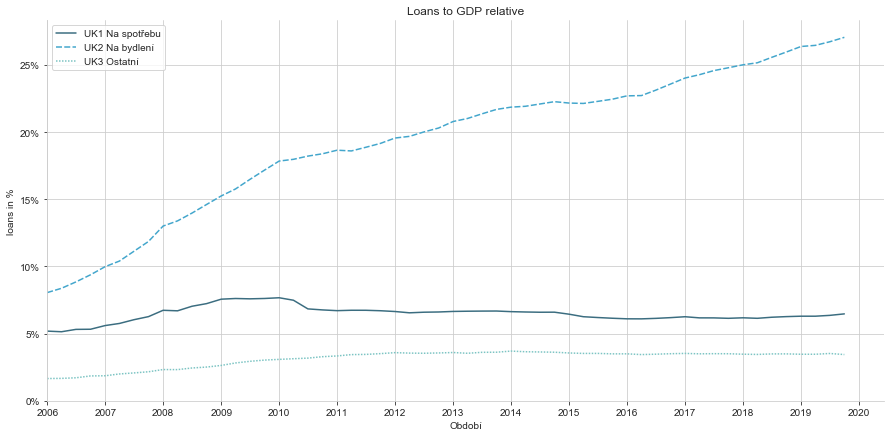

In [33]:
plt.figure(figsize=(15, 7))
ax = sns.lineplot(data=loans_to_gdp_rel.iloc[:,1:],palette='GnBu_d',size = 2)

plt.ylim(0)
plt.xlim(loans_to_gdp_rel.index[0])
plt.title('Loans to GDP relative')
ax.set(ylabel='loans in %')
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

ax.tick_params(axis='both', bottom=True, left=True)

sns.despine()

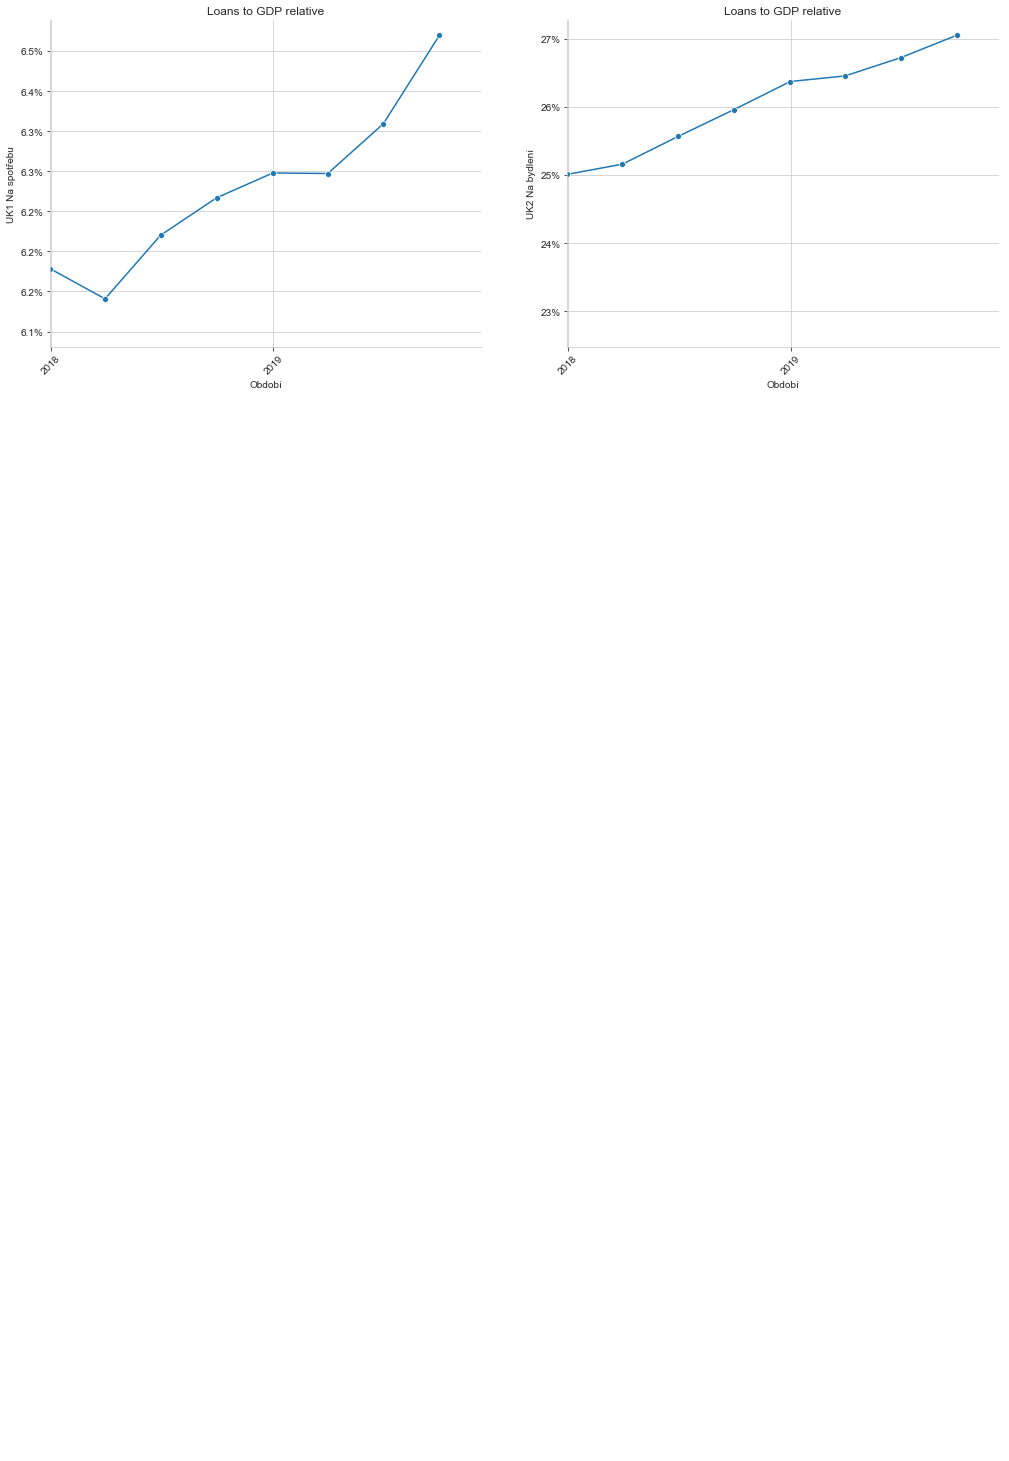

In [34]:
Title_relative = 'Loans to GDP relative'
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(17,6))
data_rel = loans_to_gdp_rel.iloc[-16:,:]  # selects data subset for the last 4 years

ax1 = sns.lineplot(data=data_rel, y='UK1 Na spotřebu', x=data_rel.index, ax=ax1, marker="o")
ax2 = sns.lineplot(data=data_rel, y='UK2 Na bydlení', x=data_rel.index, ax=ax2, marker="o")

ax1.set_title(Title_relative)
ax1.set_xlim(left=data_rel.index[-8])
ax1.set_yticklabels(['{0:.1%}'.format(x) for x in ax1.get_yticks()])
ax1.set_xticklabels(data_rel.index.strftime("%b / %y"), rotation = 45)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax2.set_title(Title_relative)
ax2.set_xlim(left=data_rel.index[-8])
ax2.set_yticklabels(['{0:.0%}'.format(x) for x in ax2.get_yticks()])
ax2.set_xticklabels(data_rel.index[-12:].strftime("%b / %y"), rotation = 45)

ax2.xaxis.set_major_locator(years)
ax2.xaxis.set_major_formatter(years_fmt)
ax2.xaxis.set_minor_locator(months)

for ax in (ax1,ax2):
    ax.tick_params(axis='both', bottom=True, left=True)
    
for x,y in zip(data_rel.index,data_rel.iloc[:,1]):
    ax2.annotate("{:.1%}".format(y), # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
sns.despine()

---------------------------
### 4. Inflation - only data till 2016?

In [316]:
data['cpi_data'].drop(axis=1,columns=list(data['cpi_data'].columns)[4:],inplace=True)

In [317]:
data['cpi_data'] = data['cpi_data']-100

NameError: name 'loans_to_gdp_rel' is not defined

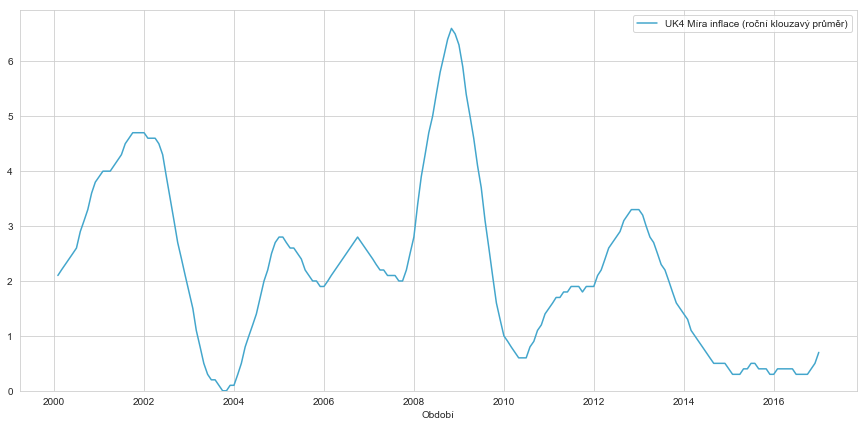

In [318]:
plt.figure(figsize=(15, 7))
cpi = data['cpi_data'].iloc[:,3].to_frame()
y, x = data['cpi_data'].iloc[:,3].to_frame(), data['cpi_data'].index.to_frame()
ax = sns.lineplot(data=cpi,palette='GnBu_d')

plt.ylim(0)
plt.xlim(loans_to_gdp_rel.index[0])
plt.title('Inflation')
ax.set(ylabel='Inflation [%]')
ax.set_yticklabels(['{:,.1f}'.format(x) for x in ax.get_yticks()])

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

ax.tick_params(axis='both', bottom=True, left=True)

sns.despine()

In [111]:
data['cpi_data'].iloc[:,3].index.to_frame().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 237 entries, 2000-01-31 to 2019-09-30
Data columns (total 1 columns):
Období    237 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.7 KB


In [20]:
data['cpi_data'].tail()

,UK1 předchozí měsíc = 100,UK2 stejné období předchozího roku = 100,UK3 průměr roku 2005 = 100,UK4 Míra inflace (roční klouzavý průměr)
Období,,,,
2019-05-31,NaN,NaN,NaN,NaN
2019-06-30,NaN,NaN,NaN,NaN
2019-07-31,NaN,NaN,NaN,NaN
2019-08-31,NaN,NaN,NaN,NaN
2019-09-30,NaN,NaN,NaN,NaN


## Loans decomposition

<b>Celkove uvery</b> = nefinancni inst. + financni inst. + vladni + domacnosti + nerezidenti

In [250]:
url_loans = 'https://www.cnb.cz/cnb/STAT.ARADY_PKG.VYSTUP?p_period=1&p_sort=1&p_des=50&p_sestuid=44895&p_uka=1%2C2%2C3%2C4%2C5%2C6%2C7%2C8%2C9%2C10%2C11&p_strid=AABBAA&p_od=200501&p_do=202512&p_lang=CS&p_format=2&p_decsep=.'

In [251]:
loans = pd.read_csv(url_loans, sep='|', encoding='utf-8')

In [253]:
loans.iloc[:,0] = pd.to_datetime(loans.iloc[:,0])
loans.set_index('Období',inplace=True)

In [254]:
loans = loans.drop(loans.iloc[:,6:9],axis=1) # drop some unuseful columns (domacnosti - decomposition)
loans.dropna(inplace=True)

In [258]:
loans_rel = loans.pct_change(periods=12)

In [261]:
loans_rel.tail()

,UK1 Rezidenti a nerezidenti celkem,UK2 Rezidenti,UK3 Nefinanční podniky,UK4 Finanční instituce (od r. 2008 bez spořitelních a úvěrních družstev),UK5 Vládní instituce,UK6 Domácnosti,UK10 Neziskové instituce sloužící domácnostem,UK11 Nerezidenti
Období,,,,,,,,
2019-08-31,0.042727,0.044946,0.039078,-0.043267,-0.028615,0.064909,0.012474,0.021133
2019-09-30,0.040973,0.039635,0.032978,-0.076304,-0.019195,0.064251,-0.010666,0.053890
2019-10-31,0.042508,0.041565,0.025085,0.003959,-0.048589,0.061210,-0.007947,0.051594
2019-11-30,0.042320,0.043511,0.034074,-0.021639,0.015264,0.060218,-0.029132,0.030931
2019-12-31,0.043513,0.050058,0.036737,0.034297,0.010443,0.062147,-0.038874,-0.016488


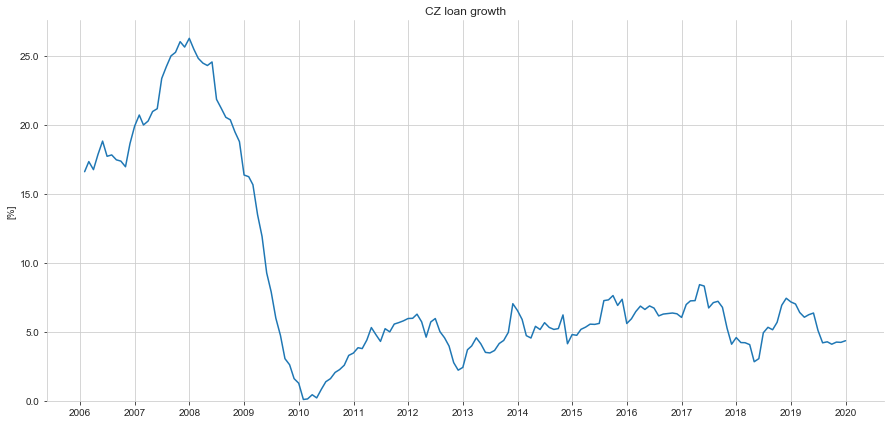

In [284]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(loans_rel.iloc[:,0])

plt.ylim(0)
# plt.xlim(loans_rel.index[0])
plt.title('CZ loan growth')
ax.set(ylabel='[%]')
ax.set_yticklabels(['{:,.1f}'.format(x*100) for x in ax.get_yticks()])

ax.xaxis.set_major_locator(years)
#ax.xaxis.set_major_formatter(years_fmt)
#ax.xaxis.set_minor_locator(months)

ax.tick_params(axis='both', bottom=True, left=True)

sns.despine()

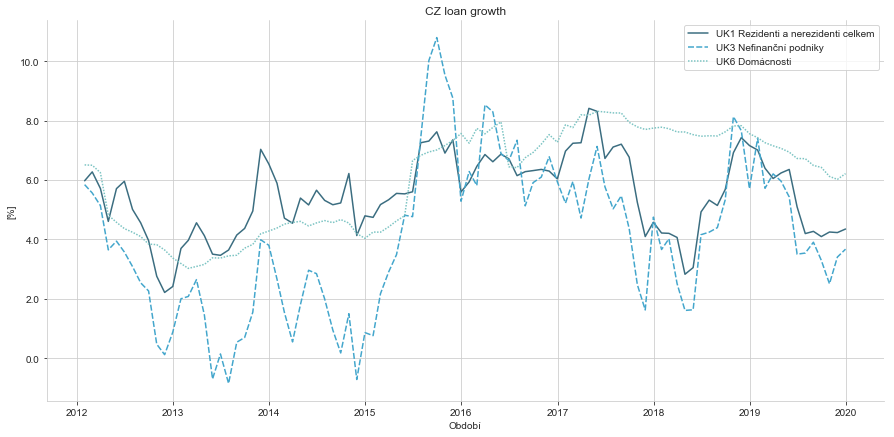

In [321]:
plt.figure(figsize=(15, 7))
ax = sns.lineplot(data=loans_rel.iloc[84:,[0,2,5]],palette='GnBu_d',size = 2)

plt.title('CZ loan growth')
ax.set(ylabel='[%]')
ax.set_yticklabels(['{:,.1f}'.format(x*100) for x in ax.get_yticks()])

ax.xaxis.set_major_locator(years)
ax.tick_params(axis='both', bottom=True, left=True)

sns.despine()

In [11]:
d = {'x': [1, 2, 3], 'y': [4, 1, 2], 'type': 'bar', 'name': 'CSOB'}

In [12]:
d

{'x': [1, 2, 3], 'y': [4, 1, 2], 'type': 'bar', 'name': 'CSOB'}

In [14]:
d = dict(x=[1,2,3], y=[4,2,1])
d

{'x': [1, 2, 3], 'y': [4, 2, 1]}

### Trash 

### Matplotlib plotting:

In [ ]:
# Plotting loans relative changes
Title_relative = 'Relative y/y changes'
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(17,6))

ax1 = sns.lineplot(data=data['loans_data'],x = data['loans_data'].index,y = data['loans_data'].iloc[:,3],palette='Blues', ax=ax1)
ax2 = sns.lineplot(data=data['loans_data'],x = data['loans_data'].index,y = data['loans_data'].iloc[:,4],palette='Blues', ax=ax2)

ax1.set_title(Title_relative)
#ax1.set_ylim(top=0.1)
#ax1.set_xlim(left=data['loans_data'].index[60])
ax1.set_yticklabels(['{:,.0%}'.format(x) for x in ax1.get_yticks()])

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax2.set_title(Title_relative)
#ax2.set_xlim(left=data['loans_data'].index[120])
ax2.set_yticklabels(['{:,.0%}'.format(x) for x in ax2.get_yticks()])

ax2.xaxis.set_major_locator(years)
ax2.xaxis.set_major_formatter(years_fmt)
ax2.xaxis.set_minor_locator(months)

sns.despine()